In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [40]:
#Test brownian bridge

a=5
b=8

t1=0
t2=10

n_na_days=3

times=np.linspace(t1,t2,n_na_days+2) #two longer than n_na_days, to account for fixed endpoints.
scaled_times= (times-times[0])/(times[-1]-times[0])

print(scaled_times)


[0.   0.25 0.5  0.75 1.  ]


In [42]:
deltat=1/(n_na_days+1) #come back to this.
deltat

0.25

In [46]:
b_motion=[0]
for i in range(n_na_days+1):
    b_motion.append(fill[i]+np.sqrt(deltat)*np.random.randn())
    
print([round(num,2) for num in b_motion])

[0, 0.55, 0.39, 0.26, -0.73]


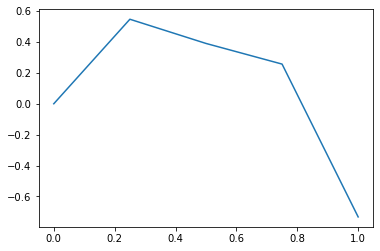

In [47]:
plt.plot(scaled_times, b_motion)
plt.show()

In [48]:
b_bridge0 = b_motion-scaled_times*b_motion[-1]
b_bridge0

array([0.        , 0.73021988, 0.75675916, 0.80620237, 0.        ])

In [78]:
b_bridge_fill =(1-scaled_times)*a + scaled_times*b + b_bridge0
b_bridge_fill[-1]

8.0

In [112]:
vari = scaled_times*(1-scaled_times)
ints = scipy.stats.norm.interval(0.95, loc=b_bridge_fill[1:-1], scale=vari[1:-1])
up_95=ints[1]
low_95=ints[0]

up_95f=[a]
up_95f.extend(list(up_95))
up_95f.extend([b])
low_95f=[a]
low_95f.extend(low_95)
low_95f.extend([b])

#print(low_95f, up_95f)

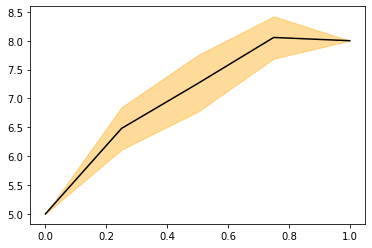

In [113]:
fig, ax = plt.subplots()

ax.plot(scaled_times, b_bridge_fill, color='black')
ax.fill_between(scaled_times, low_95f, up_95f, color='orange',alpha=.4)

In [69]:
result=pd.DataFrame({"test":[5,np.nan,np.nan,np.nan,8]}).interpolate(method="linear")

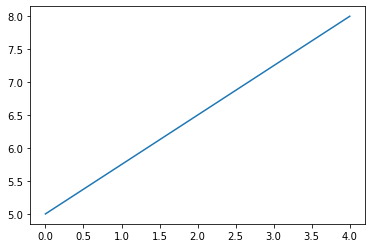

In [71]:
plt.plot(result.test)
